In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', context='talk')

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset='train')

In [3]:
X, y = data.data, data.target

In [4]:
# number of docs, average lines in each category
split_X = [doc.strip().split('\n') for doc in X]
# drop lines made of duplicated chars
clean_X = [[line for line in lst if len(set(list(line))) > 1] for lst in split_X]
num_lines = [len(lst) for lst in split_X]


# average words in each category
num_words = []

for doc in X:
    word_count = 0
    for line in doc.strip().split('\n'):
        if line:
            words = line.split()
            word_count += len([w for w in words if w])
    num_words.append(word_count)
    

df1 = pd.DataFrame({'Category': y, 'num_lines': num_lines, 'num_words': num_words})
df2 = df1.groupby('Category').agg({'Category': 'count', 'num_lines': 'mean', 'num_words': 'mean'})
df2.rename(columns={'Category': 'num_docs'}, inplace=True)

df2.head()

,num_docs,num_words,num_lines
Category,,,
0,480,345.235417,50.685417
1,584,225.248288,39.657534
2,591,215.096447,58.715736
3,590,207.335593,33.330508
4,578,185.643599,29.520761


In [5]:
df1.describe()

,Category,num_lines,num_words
count,11314.000000,11314.000000,11314.000000
mean,9.293000,44.794591,287.470126
std,5.562719,85.037914,541.482636
min,0.000000,4.000000,14.000000
25%,5.000000,20.000000,108.000000
50%,9.000000,29.000000,176.000000
75%,14.000000,43.000000,293.000000
max,19.000000,1844.000000,11821.000000


In [6]:
print(X[df1[df1.num_lines==1844].index.values[0]])

From: mjp@watson.ibm.com (Michael Phelps)
Subject: Re: Need Senate Bill numbers and House Resolution numbers
Originator: mjp@bwa.kgn.ibm.com
Reply-To: mjp@vnet.ibm.com (Michael J. Phelps)
Disclaimer: This posting represents the poster's views, not necessarily those of IBM.
Nntp-Posting-Host: bwa.kgn.ibm.com
Organization: IBM Kingston NY
Lines: 1835


Try the firearms archive.  Larry Cipriani's instructions follow.  By
the way, thanks for the archive Larry..

This year is the 103rd congress directory.

----------------------------
From
watson!yktnews.watson.ibm.com!newsgate.watson.ibm.com!news.ans.net!howland.r
reston.ans.net!bogus.sura.net!darwin.sura.net!dtix.dt.navy.mil!mimsy!cbvox1.
.att.com!lvc Thu Apr  8 19:41:01 1993
Article: 40039 of talk.politics.guns
Path:
watson!yktnews.watson.ibm.com!newsgate.watson.ibm.com!news.ans.net!howland.r
reston.ans.net!bogus.sura.net!darwin.sura.net!dtix.dt.navy.mil!mimsy!cbvox1.
.att.com!lvc
From: lvc@cbvox1.att.com
Newsgroups: talk.politics.guns
S

### ↑↑ 关于分词

考虑到不同类别的文档在语言表达上可能会有区别，如果按照正则分词（连续的字母或数字）可能会模糊掉这种区别。比如，对于训练集中第3514篇文档，包含如下的内容：

> .../usr0/anon/pub/firearms/politics/rkba...att!cbvox1!lvc or...File: congress/102nd/HCR11...

这样的表达在很大程度上反映了这篇文档在信息上的某种特征，如果按照正则分词，则会将片段`att!cbvox1!lvc`拆分为 att, cbvox1和lvc三个词段，但实际上完整的片段`att!cbvox1!lvc`更能突出这篇文章的信息特点。

所以，**分词时，使用简单的空格拆分，反而效果可能会更好一些。**（后面可做验证）

C:\Users\zzcon\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


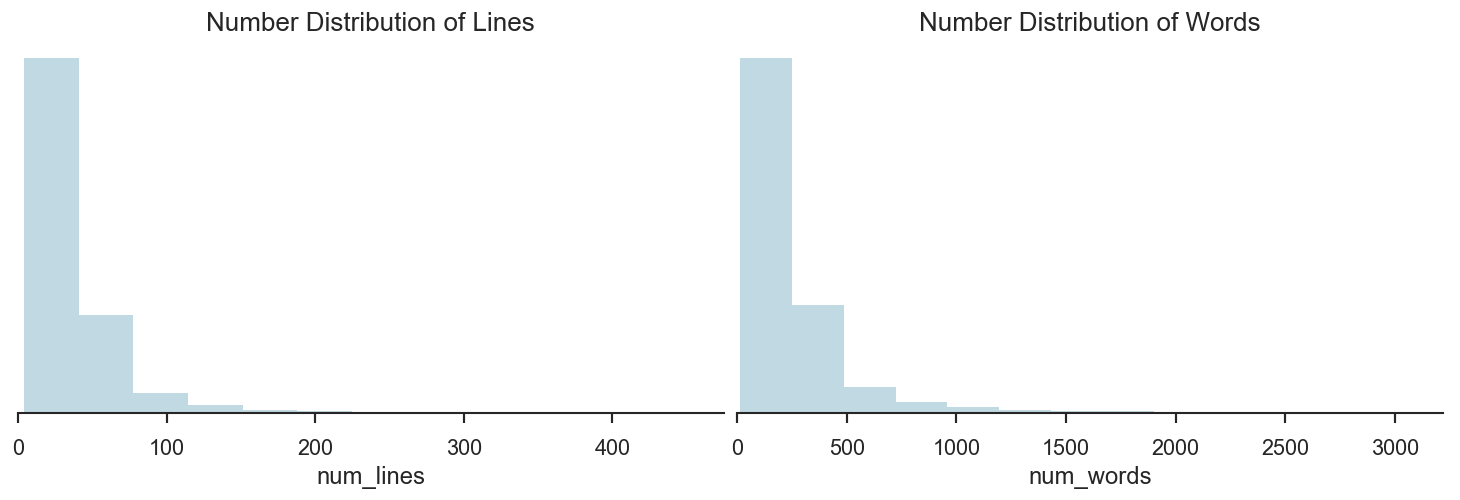

In [7]:
indicators = ['num_lines', 'num_words']
titles = {'num_lines': 'Number Distribution of Lines',
          'num_words': 'Number Distribution of Words'}
bins = {'num_lines': [0, 50, 100, 150, 200],
        'num_words': [0, 400, 800, 1200, 1600, 2000]}

fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=120)

for i, indicator in enumerate(indicators):
    sns.distplot(df1[indicator], color='#66a1ba', kde=False, ax=ax[i])
    ax[i].set_title(titles[indicator])
    ax[i].set_xlim(0, df1[indicator].mean()+df1[indicator].quantile(0.75) * 10)
    
sns.despine(left=True)
plt.setp(ax, yticks=[])
plt.tight_layout(pad=0.1)
plt.show()

大部分文档包含的句子的数量在50以内，除了少数文档外，几乎所有的文档都不超过100个句子。其中典型的一篇长文档有1844个句子（行），里面主要包含某种信息的多个相关存档内容，所以比较长。

为了保留每篇文档的语言表达特征，主要使用空格分词。绝大部分文档所包含的单词数量都不超过500。

整体上来看，整个训练集中，文档的句子和用词的数量分布相对比较集中和一致，在句子和单词数量上不需要对文档做过多处理。

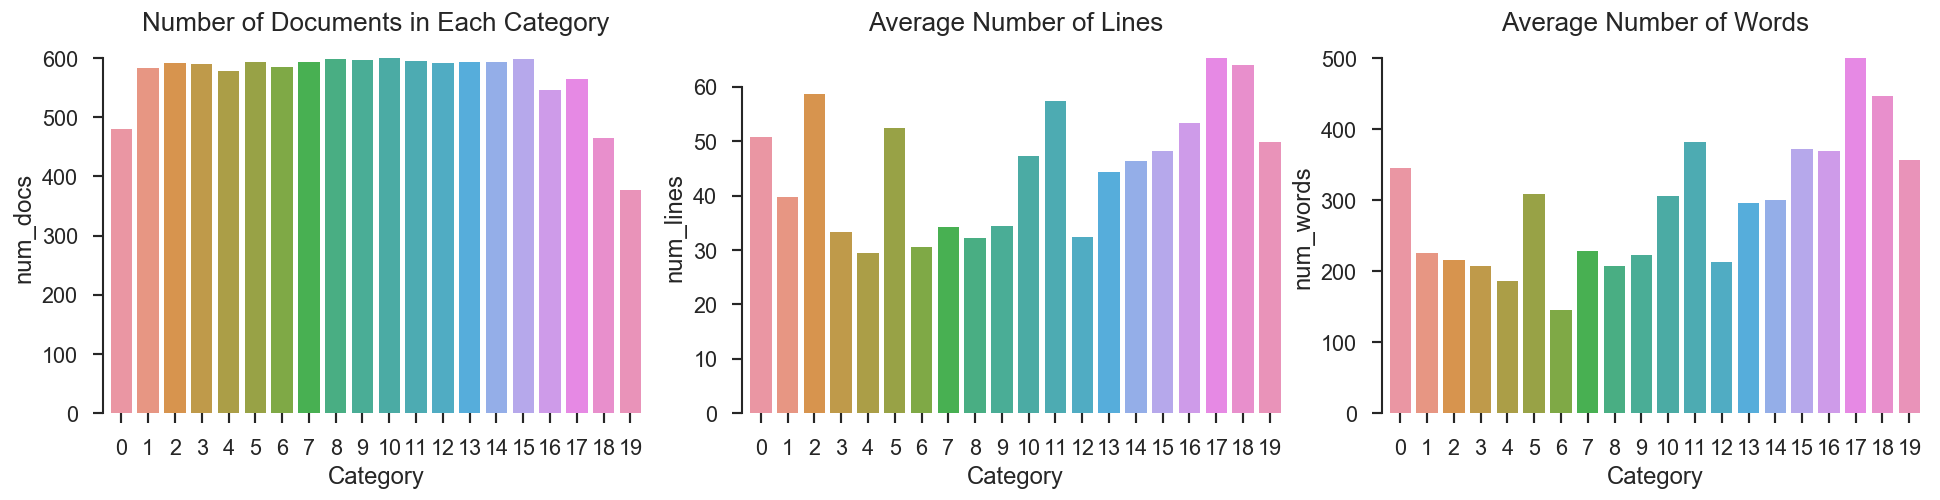

In [9]:
indicators = ['num_docs', 'num_lines', 'num_words']
titles = {'num_docs': 'Number of Documents in Each Category',
          'num_lines': 'Average Number of Lines',
          'num_words': 'Average Number of Words'}

fig, ax = plt.subplots(1, 3, figsize=(16, 4), dpi=120)

for i, indicator in enumerate(indicators):
    sns.barplot(x=df2.index, y=indicator, data=df2, ax=ax[i])
    ax[i].set_title(titles[indicator])
    
sns.despine(bottom=True, offset=3, trim=True)
plt.tight_layout(pad=0.1)
plt.show()

- 每个类别的文档数量基本相当，有17个类别的均包含近600篇文档，有两个类别的文档数量在480左右，还有一个类别只包含近400篇文档。
- 每个类别的文档所包含的平均行数也无明显特征，有12个类别下文档的平均句子数量在40以上，其余8个类别的不超过40。
- 此外，每个类别的文档所包含的单词的平均数量也无明显的分布特征，其分布与每个类别下文档所包含的句子的分布几乎一致，说明大部分的文档内容结构（句子和单词数量）是相近的，无明显特征。

